# 104. Maximum Depth of Binary Tree

### Difficulty: <font color = green> Easy </font>

---

Given the `root` of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.


---

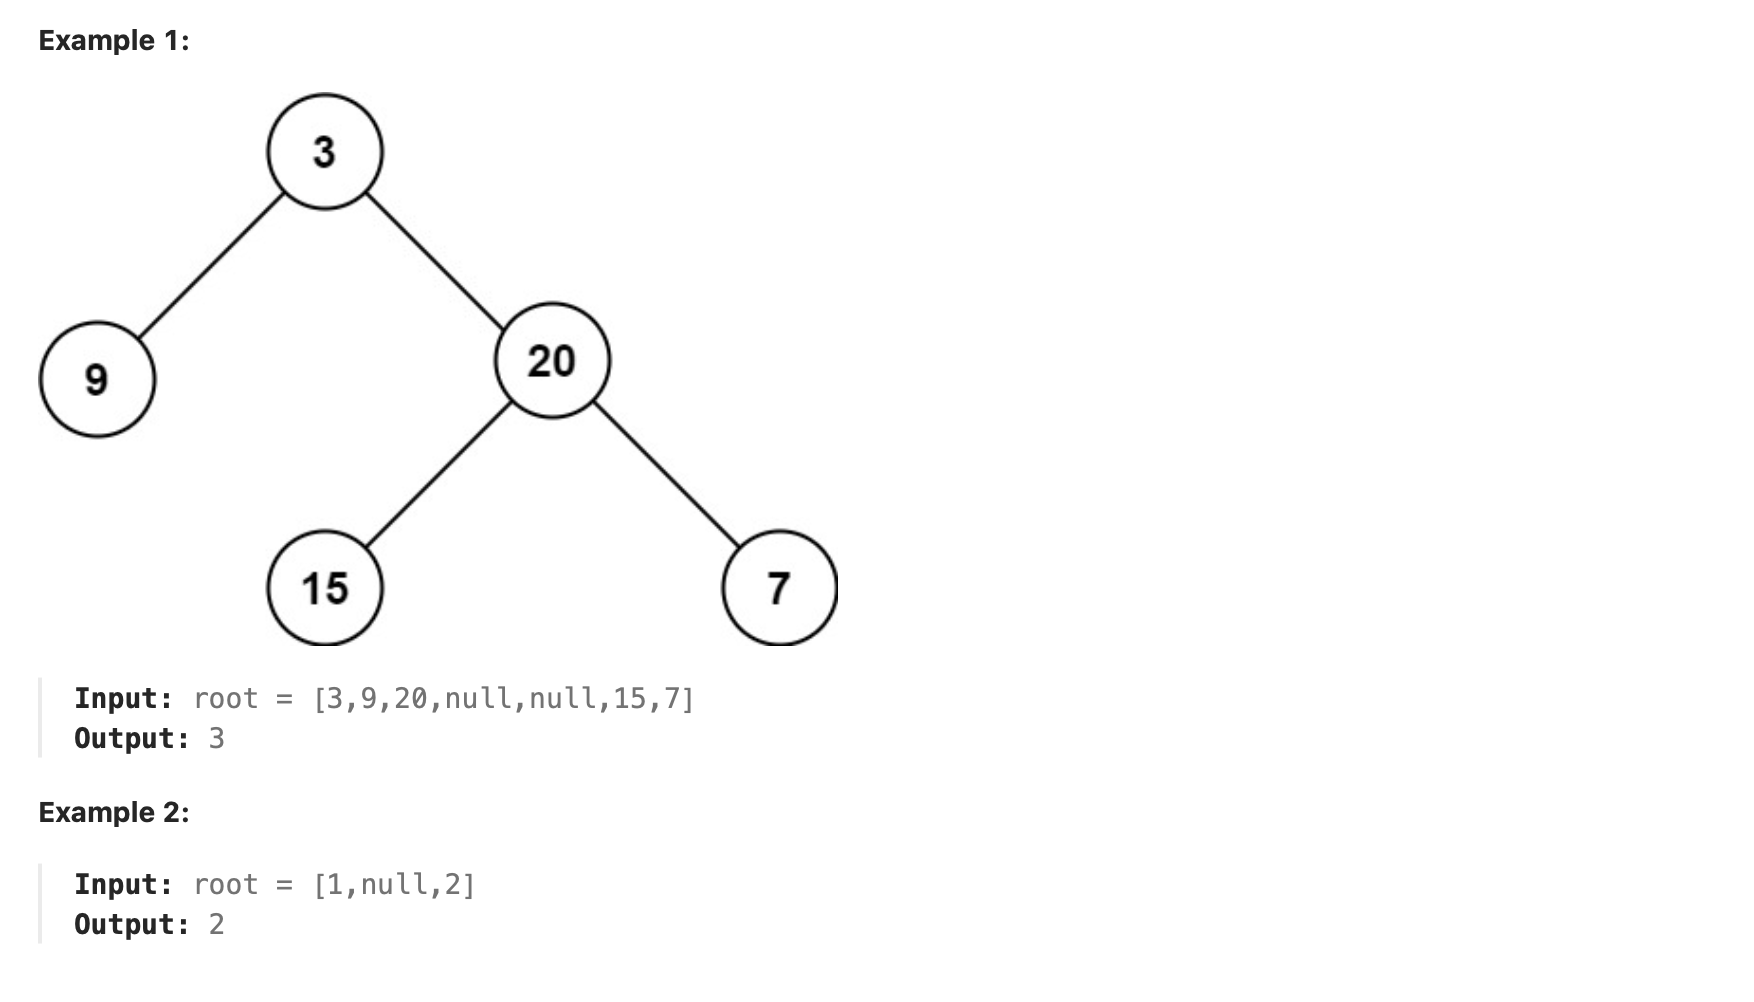

#### Constraints:

- The number of nodes in the tree is in the range $[0, 104]$.

- $-100 <= Node.val <= 100$

## Approach Overview: 

Transerve through the binary tree in <i>pre-order</i> and calculate the maximum depth of tree using recursion

## Key Steps:

1. **Base Case**: Check if the current node is empty. If the node is empty (i.e., it's None), return a depth of 0 since there's no depth to calculate for an absent node.

2. **Recursive Depth Calculation**: Perform a pre-order traversal and calculate the depth of the tree. Specifically, for each node, recursively calculate the depth of its left and right children, and then combine these depths to determine the node's own depth. This is done from the bottom level up, culminating in the depth of the root node.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        #This function uses 

        # base case
        # check if current node is empty (is node = None?)
        if not root:
            return 0
        
        # using recursion, calculate the maximum depth of the entire tree 
        return 1 + max( self.maxDepth(root.left), self.maxDepth(root.right) )

## Alternative BFS Iterative Solution :

Interestingly recursion isn't the only way we can solve this problem. We can do it iteratively too, using BFS (Breadth First Search). Let's explore the iterative BFS solution.

## Approach Overview:

This approach proved to be a good learning opportunity on data structures and manipulating their contents.
Basically we are going to traverse the binary tree, level by level and each time we finish traversing a level (starting with the leftmost node on that level all the way to the rightmost node on that same level)  we will increment the count of level. 

We are going to be traversing the tree level by level that's the main gist of the algo.

## Key Steps:

1. Implement base case, if current node is empty return 0 (you know because depth is 0 because there is no node)
   #### base case
   `if not root:`
    
      `return 0`
      
2. Initialize a deque that will store all the nodes on a certain level: 

   `d = deque([root])`

3. Initialize a variable that will keep track of the current level we are on: 

   `level = 0`

4. use a while loop to traverse through entire tree, stop when we reach the end of tree (i.e. when deque is empty)

   `while d:`

5. traverse through all the nodes on the current level (from left to right):

    `for i in range( len(d) ):`

6.  remove leftmost node in the deque inorder for us to process it:
 
    `currentNode = d.popleft()`
 
7. check if the current node has a left child, if it does add the left child to the deque:
    
    `if currentNode.left:`
    `d.append(currentNode.left)`
    
8. check if the current node has a right child, if it does add the right child to the deque:
   
    `if currentNode.right:`
    `d.append(currentNode.right)`
    
9. Once we finished traversing through all the nodes on the current level (once the for loop finish looping through all the nodes on current level), we calculate the current depth of the tree (and move on to the next level):
 
    `level += 1`
 
10. once we finish traversing through the entire tree (once the deque is empty, meaning we've visited every node in the tree and popped all of them from the deque), now we have the correct results for the depth of the tree. 
    
    `return level`

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import deque

class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:

        # check if current node is empty
        if not root:
            return 0

        # initialize a deque with the root node (top level node)
        d = deque([root])

        # initialize level counter
        level = 0
        
        # continue as long as deque is not empty
        while d:
            
            # traverse through all nodes in current level
            for i in range(len(d)):
                
                # pop the leftmost node from the deque 
                # e.g for d = [2, 3, 5, 6, 7]
                # d.popleft() = 2
                currentNode = d.popleft()
               
                # check if current node has a left child 
                if currentNode.left:
                    
                    # add left child to the deque
                    d.append(currentNode.left)
                # check if current node has a right child 
                if currentNode.right:    
                    # add right child to the deque
                    d.append(currentNode.right)
            
            # increment level count
            level += 1   
        
        # return the level
        return level 

## Alternative DFS Iterative Solution:



## Approach Overview:

So this alternative approach involves using a depth first search method to calculate the maximum depth of the tree instead of using breadth first search (level order traversal). 

In depth first search we go as deep as we can in the binary tree to calculate its maximum depth instead of going level of level. This is the big difference of this method.

## Key Steps:

1. Implement base case (if node is empty / null then depth is obviously zero)

   `if not root:`
  
   `return 0`

2. Initialize a variable that will keep track of the depth of the node were visiting and processing, we initialize it to 1 because the current node (root of tree) is at a depth of 1

   `depth = 1`

3. Initialize a dummy variable that will keep STORAGE of the MAXIMUM tree depth encountered so far (i.e depth of the deepest node we've encountered so far in the tree). 

   This is a very important variable because without it we won't be able to keep store of the maximum depth of the tree (i.e we won't store the depth of the deepest node in the tree)
    
    Let's initialize it to **zero**

   `maxDepth = 0`
   
4. Intialize a stack that will store the nodes in the tree for processing (we use a stack because stack data structure the best emulator of a recursion call, because it has a LIF0 / Last - In - First - Out operation)

   `stack = [[root, depth]]`
   
5. Traverse the entire (continue of depth first search operation until we've visited every node in the tree)

   `while stack:`
   
6. Remove last item (current node and its corresponding depth) in stack for processing
   
   `currentNode, depth = stack.pop()`
   
7. Update the maximum depth of the tree (i.e depth of the deepest node we've encountered so far)

   `maxDepth = max(depth, maxDepth)` 
  
  
8. START PROCESSING THE NODE! Firstly let's check whether current node has a right child. If yes, then calculate the depth of that child (increment current depth count) and add that child and its corresponding depth to the stack.
    
    `if currentNode.right:`
    
    `stack.append([currentNode.right, depth + 1])`
    
9. Secondly, let's check whether current node has a left child. If yes, then calculate the depth of that child (increment current depth count) and add that child and its corresponding depth to the stack.

    `if currentNode.left:`
    
    `stack.append([currentNode.left, depth + 1])`

10. After its all traversed and done, we return the result for the maximum depth of the binary tree

     `return maxDepth`

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
#from collections import deque

class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        
        # check if current node is empty
        if not root:
            return 0
        
        # initialize depth level 
        depth = 1
        
        # initialize a variable that will keep track of maximum depth of tree
        maxDepth = 0

        # initialize a stack that will store nodes
        stack = [[root, depth]]
        
        # continue until stack is empty (until we finish traversing through entire tree)
        while stack:
            
            # pop last element in stack (retrieve the current node and its corresponding depth)
            currentNode, depth = stack.pop()
            
            # calculate maximum depth encountered so far
            maxDepth = max(depth, maxDepth)
            
            # check if current node has a right child
            if currentNode.right:
            
                # add the right child and its depth to the stack
                stack.append([currentNode.right, depth + 1])
            
            # check if current node has a left child 
            if currentNode.left:    
            
                # add the left child and its depth to the stack
                stack.append([currentNode.left, depth + 1])
        
        # return the maximum depth of the binary tree
        return maxDepth